# 3.1 Create three linear regression models to predict rating using  lasso, ridge, elastic net regularization techniques. Also create an ordinary linear regression model without regularization. (20 points)

# 3.2 For the ridge model, find a proper value for the lambda (alpha)  parameter by drawing the R-squared value against the lambda in a diagram (Use k-fold cross validation).

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error
#from math import sqrt
from sklearn.linear_model import RidgeCV

In [2]:
df = pd.read_csv('cereal.csv',sep=";") 
print(df.shape)
df.describe()

(78, 16)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
unique,78,8,3,12,7,6,28,14,23,18,37,4,4,8,13,78
top,String,K,C,110,3,1,0,0,13,3,110,25,3,1,1,Float
freq,1,23,74,29,28,30,9,19,8,13,5,63,36,64,30,1


In [3]:
df = df.iloc[1:]
df.drop(["name"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
df = df.astype({'calories':'float', 'protein':'float', 'fat':'float', 'sodium':'float', 'fiber':'float', 'carbo':'float',
       'sugars':'float', 'potass':'float', 'vitamins':'float', 'shelf':'float', 'weight':'float', 'cups':'float', 'rating':'float'})
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
2,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
3,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
4,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
5,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3.0,1.0,0.75,34.384843


In [5]:
df = pd.get_dummies(df,columns=['mfr','type'])
df.dropna(inplace=True)
df


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
1,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,...,68.402973,0,0,0,1,0,0,0,1,0
2,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,...,33.983679,0,0,0,0,0,1,0,1,0
3,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,...,59.425505,0,0,1,0,0,0,0,1,0
4,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,...,93.704912,0,0,1,0,0,0,0,1,0
5,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3.0,...,34.384843,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3.0,...,39.106174,0,1,0,0,0,0,0,1,0
74,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2.0,...,27.753301,0,1,0,0,0,0,0,1,0
75,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,...,49.787445,0,0,0,0,0,0,1,1,0
76,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,...,51.592193,0,1,0,0,0,0,0,1,0


In [6]:
#Predictor and response variable
Predictors = df.drop(["rating"],axis=1,inplace=False)
response = df[["rating"]]
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,...,42.665705,0.012987,0.285714,0.298701,0.077922,0.116883,0.103896,0.103896,0.961039,0.038961
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,...,14.047289,0.113961,0.454716,0.460690,0.269807,0.323388,0.307127,0.307127,0.194771,0.194771
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,...,18.042851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,...,33.174094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,...,40.400208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,...,50.828392,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,...,93.704912,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Train and Test data
Predictors_train, Predictors_test, response_train, response_test = train_test_split(Predictors, response, test_size=0.20, random_state=1,shuffle=True)
# response_train = response_train.values.reshape(len(response_train),)
# response_test = response_test.values.reshape(len(response_test),)

In [8]:
response_test.shape

(16, 1)

In [9]:
response_train.shape

(61, 1)

In [10]:
#Linear Regression without Regularization
from sklearn import metrics

linear_reg = LinearRegression()
linear_reg.fit(Predictors_train,response_train)
ll_score = linear_reg.score(Predictors_test,response_test)
print("Score for Linear Regression without regularization:", ll_score)


Score for Linear Regression without regularization: 0.9999999999999993


In [11]:
#Ridge Regression
from sklearn.metrics import r2_score
alpha = ['0.01','0.02','0.03','0.1','0.2','0.3','0.001']
ridge_reg = Ridge()
rr_Score=[]
for i in range(len(alpha)):
  ridge_reg = Ridge(alpha = alpha[i])
  ridge_reg.fit(Predictors_train,response_train)
  pred_train_ridge_reg = ridge_reg.predict(Predictors_train)
  #print("R-Sqared Value for Ridge Regression is :", r2_score(response_train, pred_train_ridge_reg))
  rr_Score.append(r2_score(response_train,pred_train_ridge_reg))
  #print("Score for Ridge Regression:", rr_Score)

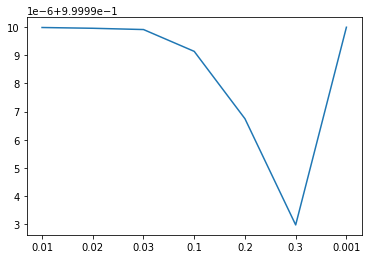

In [12]:
from matplotlib import pyplot as plt
plt.plot(alpha,rr_Score)
plt.show()

In [13]:
#Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(Predictors_train,response_train)
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(Predictors_train,response_train)
pred_train_lasso_reg = lasso_reg.predict(Predictors_train)
lr_Score = lasso_reg.score(Predictors_test,response_test)
print("Score for Lasso Regression:", lr_Score)

Score for Lasso Regression: 0.9999892124142932


In [14]:
#Elastic Net Regression
elasticnet_reg = ElasticNet()
elasticnet_reg.fit(Predictors_train,response_train)
er_score = elasticnet_reg.score(Predictors_test,response_test)
print("Score for Elastic Net Regression:", er_score)

Score for Elastic Net Regression: 0.9686236698569172


# 3.3 Calculate the variance and bias for each model of these four models and compare them.

In [15]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

Predictors_train, Predictors_test, response_train, response_test = train_test_split(Predictors, response, test_size=0.20)
response_train = response_train.values.reshape(len(response_train),)
response_test = response_test.values.reshape(len(response_test),)


In [23]:
 
# estimating the bias and variance
Avg_exp_Loss, Avg_bias, Avg_var = bias_variance_decomp(ridge_reg, Predictors_train.values, response_train, Predictors_train.values, response_train, loss='mse', num_rounds=100, random_seed=120)
print('Average expected loss: %.3f' % Avg_exp_Loss)
print('Average bias: %.3f' % Avg_bias)
print('Average variance: %.3f' % Avg_var)


Average expected loss: 0.000
Average bias: 0.000
Average variance: 0.000


In [24]:
#Calculating the variance and bias for Linear Regression

Avg_exp_Loss, Avg_bias, Avg_var = bias_variance_decomp(linear_reg, Predictors_train.values, response_train, Predictors_train.values, response_train, loss='mse', num_rounds=300, random_seed=120)
print('Average expected loss: %.3f' % Avg_exp_Loss)
print('Average bias: %.3f' % Avg_bias)
print('Average variance: %.3f' % Avg_var)

Average expected loss: 0.000
Average bias: 0.000
Average variance: 0.000


In [25]:
#Calculating the variance and bias for Ridge Regression

Avg_exp_Loss, Avg_bias, Avg_var = bias_variance_decomp(ridge_reg, Predictors_train.values, response_train, Predictors_train.values, response_train, loss='mse', num_rounds=300, random_seed=120)
print('Average expected loss: %.3f' % Avg_exp_Loss)
print('Average bias: %.3f' % Avg_bias)
print('Average variance: %.3f' % Avg_var)


Average expected loss: 0.000
Average bias: 0.000
Average variance: 0.000


In [26]:
#Calculating the variance and bias for ElasticNet Regression

Avg_exp_Loss, Avg_bias, Avg_var = bias_variance_decomp(elasticnet_reg, Predictors_train.values, response_train, Predictors_train.values, response_train, loss='mse', num_rounds=300, random_seed=120)
print('Average expected loss: %.3f' % Avg_exp_Loss)
print('Average bias: %.3f' % Avg_bias)
print('Average variance: %.3f' % Avg_var)


Average expected loss: 7.688
Average bias: 6.467
Average variance: 1.222


In [27]:
#Calculating the variance and bias for Lasso Regression

Avg_exp_Loss, Avg_bias, Avg_var = bias_variance_decomp(lasso_reg, Predictors_train.values, response_train, Predictors_train.values, response_train, loss='mse', num_rounds=300, random_seed=120)
print('Average expected loss: %.3f' % Avg_exp_Loss)
print('Average bias: %.3f' % Avg_bias)
print('Average variance: %.3f' % Avg_var)

Average expected loss: 0.001
Average bias: 0.001
Average variance: 0.001
